# HW1 - Data Exploration and Preparation

>[HW1 - Data Exploration and Preparation](#scrollTo=AaWOEIUIMac-)

>>[Part 1: Data Loading and First Look](#scrollTo=B6BWFEjaBM0w)

>>>>[Question 1:](#scrollTo=mEkdVAyB3zi4)

>>>>[Question 2:](#scrollTo=ysrUaAHM4U0C)

>>>>[Question 3:](#scrollTo=fw2zdb7a4e8F)

>>>>[Question 4:](#scrollTo=sKZRQG5f4mWB)

>>[Part 2: Warming up with k-Nearest Neighbors](#scrollTo=24_xsmseCCGP)

>>>>[Question 5:](#scrollTo=E6RWUKwb4-Ck)

>>>>[Question 6:](#scrollTo=u8TrInX95OBp)

>>>[KNN Implementation](#scrollTo=ovc6OTLr5fOP)

>>>>[Question 7:](#scrollTo=8vHMHZZT6POJ)

>>>>[Question 8:](#scrollTo=jdjcjgO1Khy8)

>>>>[Question 9:](#scrollTo=0eYsoxf-Mmgm)

>>[Part 3: Data Exploration](#scrollTo=SGpY94YKCWQV)

>>>>[Question 11:](#scrollTo=s5jXBZeXQh3f)

>>>>[Question 12:](#scrollTo=CopWgN9whNKt)

>>>>[Question 13:](#scrollTo=g8HkeMw0mA-W)

>>>>[univariate analysis](#scrollTo=9UHchnuSyIfS)

>>>>[Question 16:](#scrollTo=HP8vLldkEr4_)

>>>>[Question 17:](#scrollTo=lWRyh9PBFL3r)

>>>>[Question 18:](#scrollTo=OAAbYOy-GZh3)

>>[Part 4: More Data Normalization](#scrollTo=upNA4cWHQS5z)

>>>>[Normalization process for all features](#scrollTo=jq300eWhLcIC)

>>[Part 5: Feature Selection](#scrollTo=qVTzpyvDa2VW)

>>>>[Question 23:](#scrollTo=zDJuhiRUSmLb)

>>[Part 6: Data Preparation Pipeline](#scrollTo=dEH7l2Bpf2uW)



## Part 1: Data Loading and First Look

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Question 1: 
Loading the dataset

In [ ]:
from google.colab import files
from google.colab.data_table import DataTable

DataTable.max_columns = 40
!rm *.csv

print("Please load the raw csv data")
uploadedData = files.upload()
filename = list(uploadedData)[0]

Please load the raw csv data


Saving virus_data.csv to virus_data.csv


In [ ]:
dataset = pd.read_csv(filename)
dataset.shape

(1250, 26)

#### Question 2: 
Print the value_counts of the num_of_siblings feature

In [ ]:
dataset['num_of_siblings'].value_counts()

1    399
2    317
0    271
3    161
4     62
5     31
6      6
7      2
8      1
Name: num_of_siblings, dtype: int64

#### Question 3:
Dataset's info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             1250 non-null   int64  
 1   age                    1250 non-null   int64  
 2   sex                    1250 non-null   object 
 3   weight                 1250 non-null   float64
 4   blood_type             1250 non-null   object 
 5   current_location       1250 non-null   object 
 6   num_of_siblings        1250 non-null   int64  
 7   happiness_score        1250 non-null   int64  
 8   household_income       1250 non-null   float64
 9   conversations_per_day  1250 non-null   int64  
 10  sugar_levels           1250 non-null   int64  
 11  sport_activity         1250 non-null   int64  
 12  symptoms               930 non-null    object 
 13  pcr_date               1250 non-null   object 
 14  PCR_01                 1250 non-null   float64
 15  PCR_

#### Question 4:
Split the data into a training set (80%) and a test set (20%)

In [ ]:
from sklearn.model_selection import train_test_split

random_state = (47 + 33)
test_size = 0.2
train, test = train_test_split(dataset, test_size=test_size, random_state=random_state)

print(train.shape, test.shape)

(1000, 26) (250, 26)


## Part 2: Warming up with k-Nearest Neighbors


In [ ]:
orig_dataset = dataset.copy()

dataset = train.copy()

#### Question 5:
PCR_01, PCR_02, and PCR_09 correlation

In [ ]:
print("Correlation between 'spread' and 'PCR_01' is: {:.3f}".format(train.corr().spread.PCR_01))
print("Correlation between 'spread' and 'PCR_02' is: {:.3f}".format(train.corr().spread.PCR_02))
print("Correlation between 'spread' and 'PCR_09' is: {:.3f}".format(train.corr().spread.PCR_09))

Correlation between 'spread' and 'PCR_01' is: 0.104
Correlation between 'spread' and 'PCR_02' is: 0.525
Correlation between 'spread' and 'PCR_09' is: -0.047


#### Question 6:
PCR_01, PCR_02, and PCR_09 Plot

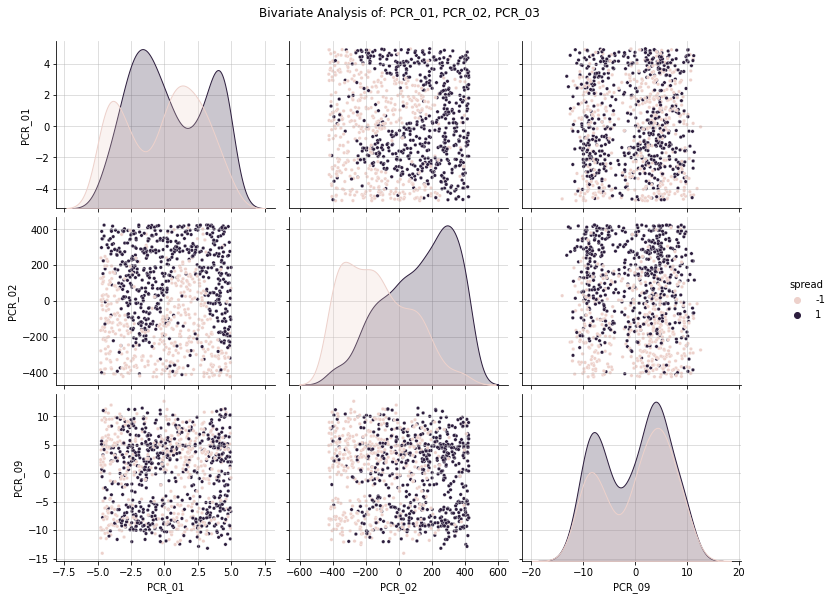

In [ ]:
g=sns.pairplot(train[['PCR_01', 'PCR_02', 'PCR_09', 'spread']], plot_kws={"s": 12}, hue="spread")
g.fig.suptitle("Bivariate Analysis of: PCR_01, PCR_02, PCR_03", y=1.04)
for ax in np.ravel(g.axes):
  ax.grid(alpha=0.5)
g.fig.set_size_inches(12,8)

### KNN Implementation

In [ ]:
from sklearn.base import BaseEstimator,ClassifierMixin
from scipy.spatial import distance
from numpy import argpartition
from scipy.stats import mode

class kNN(BaseEstimator, ClassifierMixin): 
  def __init__(self, n_neighbors:int = 5):
    self.n_neighbors = n_neighbors
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    self.X_train = np.copy(X)
    self.y_train = np.copy(y)
    return self

  def predict(self, X):
    distances = distance.cdist(XA=X, XB=self.X_train, metric='euclidean')
    nn = np.argpartition(a=distances, kth=self.n_neighbors, axis=1)[:, :self.n_neighbors]
    return mode(self.y_train[nn], axis=1)[0].flatten()


Training and testing our model:

In [ ]:
knn_df_x = np.array(train[["PCR_01", "PCR_02"]])
knn_df_y = np.array(train.spread)

knn_df_x_test = np.array(test[["PCR_01", "PCR_02"]])
knn_df_y_test = np.array(test.spread)

h = kNN(n_neighbors=1)
h.fit(knn_df_x, knn_df_y)

train_acc = h.score(knn_df_x, knn_df_y)
test_acc = h.score(knn_df_x_test, knn_df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

Training accuracy=1.0, Testing accuracy=0.716


#### Question 7:
Plotting the KNN figure

In [ ]:
def visualize_clf(clf, X, Y, title, 
                  xlabel, ylabel,
                  marker_size=50,
                  grid_length=300,
                  linewidths=None):
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap

    # For internal use here, make sure labels are 0 and 1
    Y = np.ravel(Y).astype(int)
    labels = set(Y)
    assert len(labels) == 2, "Can only visualize two unique labels"

    if labels == set([-1,1]):
      Y = (Y + 1) // 2
      labels = set(Y)
    
    assert labels == set([0,1]), "Could not handle given labels"

    plt.figure(figsize=(8, 8))

    # Parameters
    n_classes = 2
    markers = ["D", "o"]
    palette = sns.color_palette("hls", 2)
    custom_cmap = ListedColormap(palette.as_hex())

    x_delta = np.abs(X[:, 0].max() - X[:, 0].min()) * 0.1
    y_delta = np.abs(X[:, 1].max() - X[:, 1].min()) * 0.1
    x_min, x_max = X[:, 0].min() - x_delta, X[:, 0].max() + x_delta
    y_min, y_max = X[:, 1].min() - y_delta, X[:, 1].max() + y_delta
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_length),
                         np.linspace(y_min, y_max, grid_length))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.35)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.75)

    # Plot the training points
    for i, color, marker in zip(labels, palette, markers):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], color=color,
                    marker=marker,
                    edgecolor='white', s=marker_size,
                    linewidths=linewidths)

    plt.title(title, fontsize=20)
    plt.axis("tight")
    plt.show()

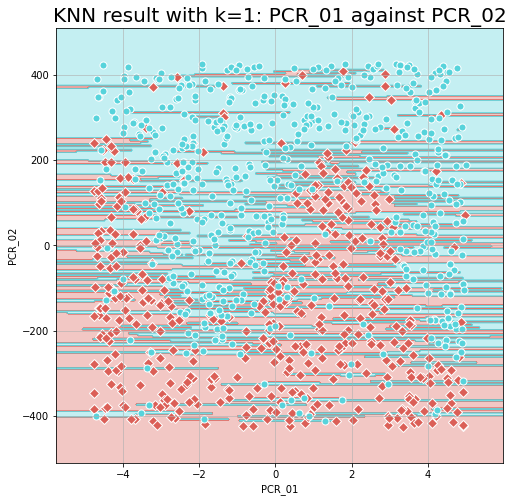

In [ ]:
visualize_clf(h, knn_df_x, knn_df_y, "KNN result with k=1: PCR_01 against PCR_02", "PCR_01", "PCR_02")

#### Question 8:
Min-max scaling, k=1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

knn_df_x = np.array(train[["PCR_01", "PCR_02"]])
knn_df_x = scaler.fit_transform(train[["PCR_01", "PCR_02"]])
knn_df_y = np.array(train.spread)

knn_df_x_test = scaler.fit_transform(test[["PCR_01", "PCR_02"]])
knn_df_y_test = np.array(test.spread)

h = kNN(n_neighbors=1)
h.fit(knn_df_x, knn_df_y)

train_acc = h.score(knn_df_x, knn_df_y)
test_acc = h.score(knn_df_x_test, knn_df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

Training accuracy=1.0, Testing accuracy=0.756


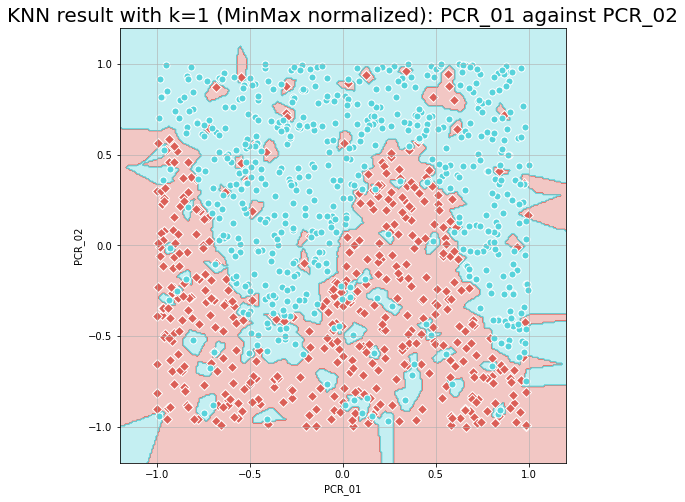

In [ ]:
visualize_clf(h, knn_df_x, knn_df_y, "KNN result with k=1 (MinMax normalized): PCR_01 against PCR_02", "PCR_01", "PCR_02")

#### Question 9:
Min-max scaling, k=7

In [ ]:
h = kNN(n_neighbors=7)
h.fit(knn_df_x, knn_df_y)

train_acc = h.score(knn_df_x, knn_df_y)
test_acc = h.score(knn_df_x_test, knn_df_y_test)

print(f'Training accuracy={train_acc}, Testing accuracy={test_acc}')

Training accuracy=0.892, Testing accuracy=0.828


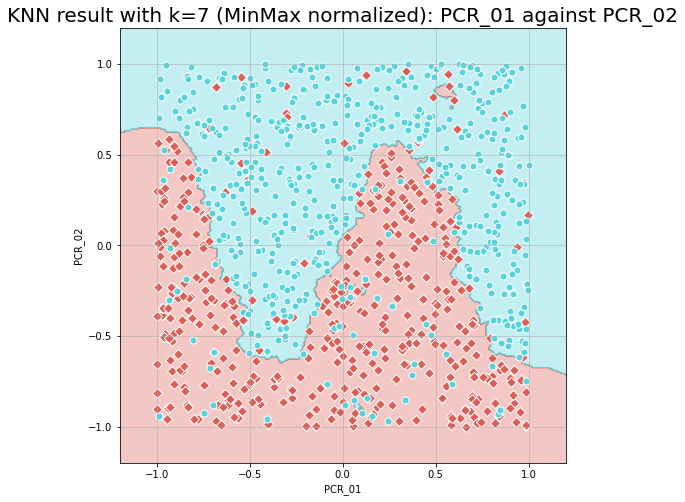

In [ ]:
visualize_clf(h, knn_df_x, knn_df_y, "KNN result with k=7 (MinMax normalized): PCR_01 against PCR_02", "PCR_01", "PCR_02")

## Part 3: Data Exploration

#### Question 11:

Split the blood groups into 3 groups

In [ ]:
blood_types = ["AB-", "AB+", "A-", "A+" "O-", "O+", "B-", "B+"]

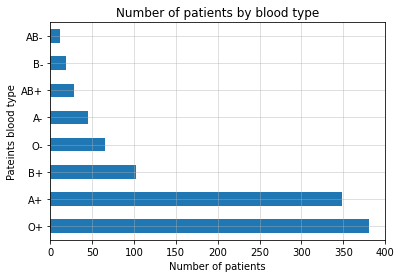

In [ ]:
dataset.blood_type.value_counts().plot(kind = 'barh')
plt.title("Number of patients by blood type")
plt.xlabel("Number of patients")
plt.ylabel("Pateints blood type")
plt.grid(alpha=0.5)

#### Question 12:
Crosstab of blood types and risk

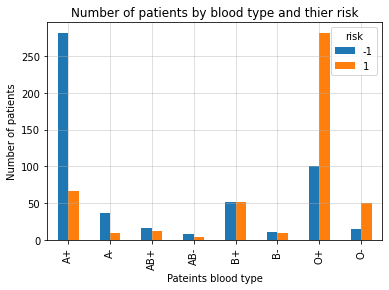

In [ ]:
pd.crosstab(dataset['blood_type'], dataset['risk']).plot(kind='bar')
plt.title("Number of patients by blood type and thier risk")
plt.ylabel("Number of patients")
plt.xlabel("Pateints blood type")
plt.grid(alpha=0.5)

3 New binary feature from blood_type

In [ ]:
# Groups we seperate by
blood_groups = {'A': ['A+', 'A-'],
                'O': ['O-', 'O+'],
                'B/AB': ['B+', 'B-', 'AB+', 'AB-']}

for type, blood_group in blood_groups.items():
    # Creating the mew features
    feature = dataset["blood_type"].isin(blood_group).astype(int)
    # Inserting the new features
    dataset['blood_group_' + type] = feature

# Drop the old blood_type feature
dataset.drop('blood_type', inplace=True ,axis=1)


#### Question 13:
Transform all features to numeric features

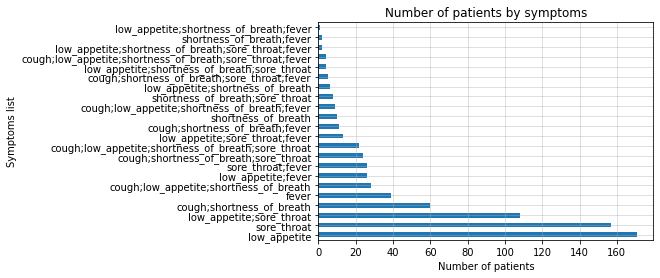

In [ ]:
dataset.symptoms.value_counts().plot(kind = 'barh')
plt.title("Number of patients by symptoms")
plt.xlabel("Number of patients")
plt.ylabel("Symptoms list")
plt.grid(alpha=0.5)

In [ ]:
symptoms_per_patient = [x.split(';') for x in dataset["symptoms"] if x is not np.nan]
symptoms = list({x for l in symptoms_per_patient for x in l})

for symptom in symptoms:
    feature = []
    for sample in dataset["symptoms"]:
        if sample is np.nan or symptom not in sample:
            feature.append(0)
        else:
            feature.append(1)

    dataset['symptom_' + symptom] = feature

# Drop the old symptoms feature   
dataset.drop('symptoms', inplace=True ,axis=1)

In [ ]:
# Drop the old current_location feature and adding x_coor and y_coor
dataset['x_global_coor'] = [float(x.split("'")[1]) for x in dataset['current_location']]
dataset['y_global_coor'] = [float(x.split("'")[3]) for x in dataset['current_location']]

dataset.drop(['current_location'], inplace=True, axis=1)

In [ ]:
# Replace current_location with binary is_male & Drop the old current_location
dataset['sex'] = dataset['sex'].isin(['F']).astype(int)

In [ ]:
from datetime import datetime

# Drop the old pcr_date feature and replace
dataset['pcr_date_numeric'] = [int(datetime.strptime(date, '%Y-%m-%d').timestamp()) for date in dataset['pcr_date']]

dataset.drop(['pcr_date'], inplace=True, axis=1)

#### univariate analysis

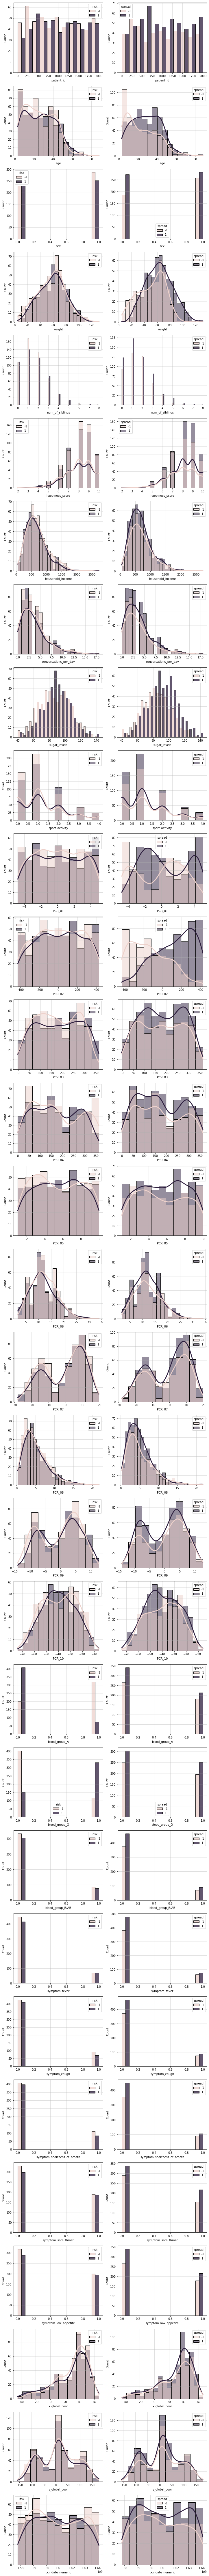

In [ ]:
COL_NAME = list(dataset.columns)
COL_NAME.remove('spread')
COL_NAME.remove('risk')

need_kde = ['weight',
            'age',
            'num_of_sibilings',
            'conversations_per_day',
            'suger_levels',
            'happiness_score',
            'household_income',
            'sport_activity',
            'PCR_01',
            'PCR_02',
            'PCR_03',
            'PCR_04',
            'PCR_05',
            'PCR_06',
            'PCR_07',
            'PCR_08',
            'PCR_09',
            'PCR_10',
            'x_global_coor',
            'y_global_coor',
            'pcr_date_numeric']

COLS = len(COL_NAME)
ROWS = len(COL_NAME)
plt.figure(figsize=(5 * COLS, 4 * ROWS)) 
for row in range(ROWS):
 column = COL_NAME[row]
 for j, cls in enumerate(["risk", "spread"]):
  plt.subplot(ROWS,COLS, row * COLS + 1 + j)

  kde = column in need_kde
  sns.histplot(data=dataset, x=column, hue=cls, line_kws={"linewidth": 3},
  kde=kde, multiple="layer" if kde else "dodge")
  plt.grid(alpha=0.5)
plt.tight_layout()

#### Question 16:
Correlation between risk label and the rest
of the features

In [ ]:
s = dataset.corr().risk.abs()
s.sort_values(kind="quicksort", ascending=False)

risk                           1.000000
blood_group_A                  0.468863
blood_group_O                  0.467145
spread                         0.066406
household_income               0.057686
PCR_03                         0.052729
weight                         0.052596
sport_activity                 0.052203
x_global_coor                  0.049552
symptom_shortness_of_breath    0.047753
PCR_09                         0.046576
symptom_cough                  0.040994
PCR_06                         0.040627
patient_id                     0.036831
age                            0.034073
sex                            0.033248
PCR_04                         0.027968
sugar_levels                   0.026079
PCR_01                         0.022335
PCR_02                         0.017687
PCR_07                         0.017461
symptom_sore_throat            0.017439
symptom_low_appetite           0.016760
PCR_05                         0.015592
PCR_08                         0.012868


#### Question 17:
Bivariate analysis

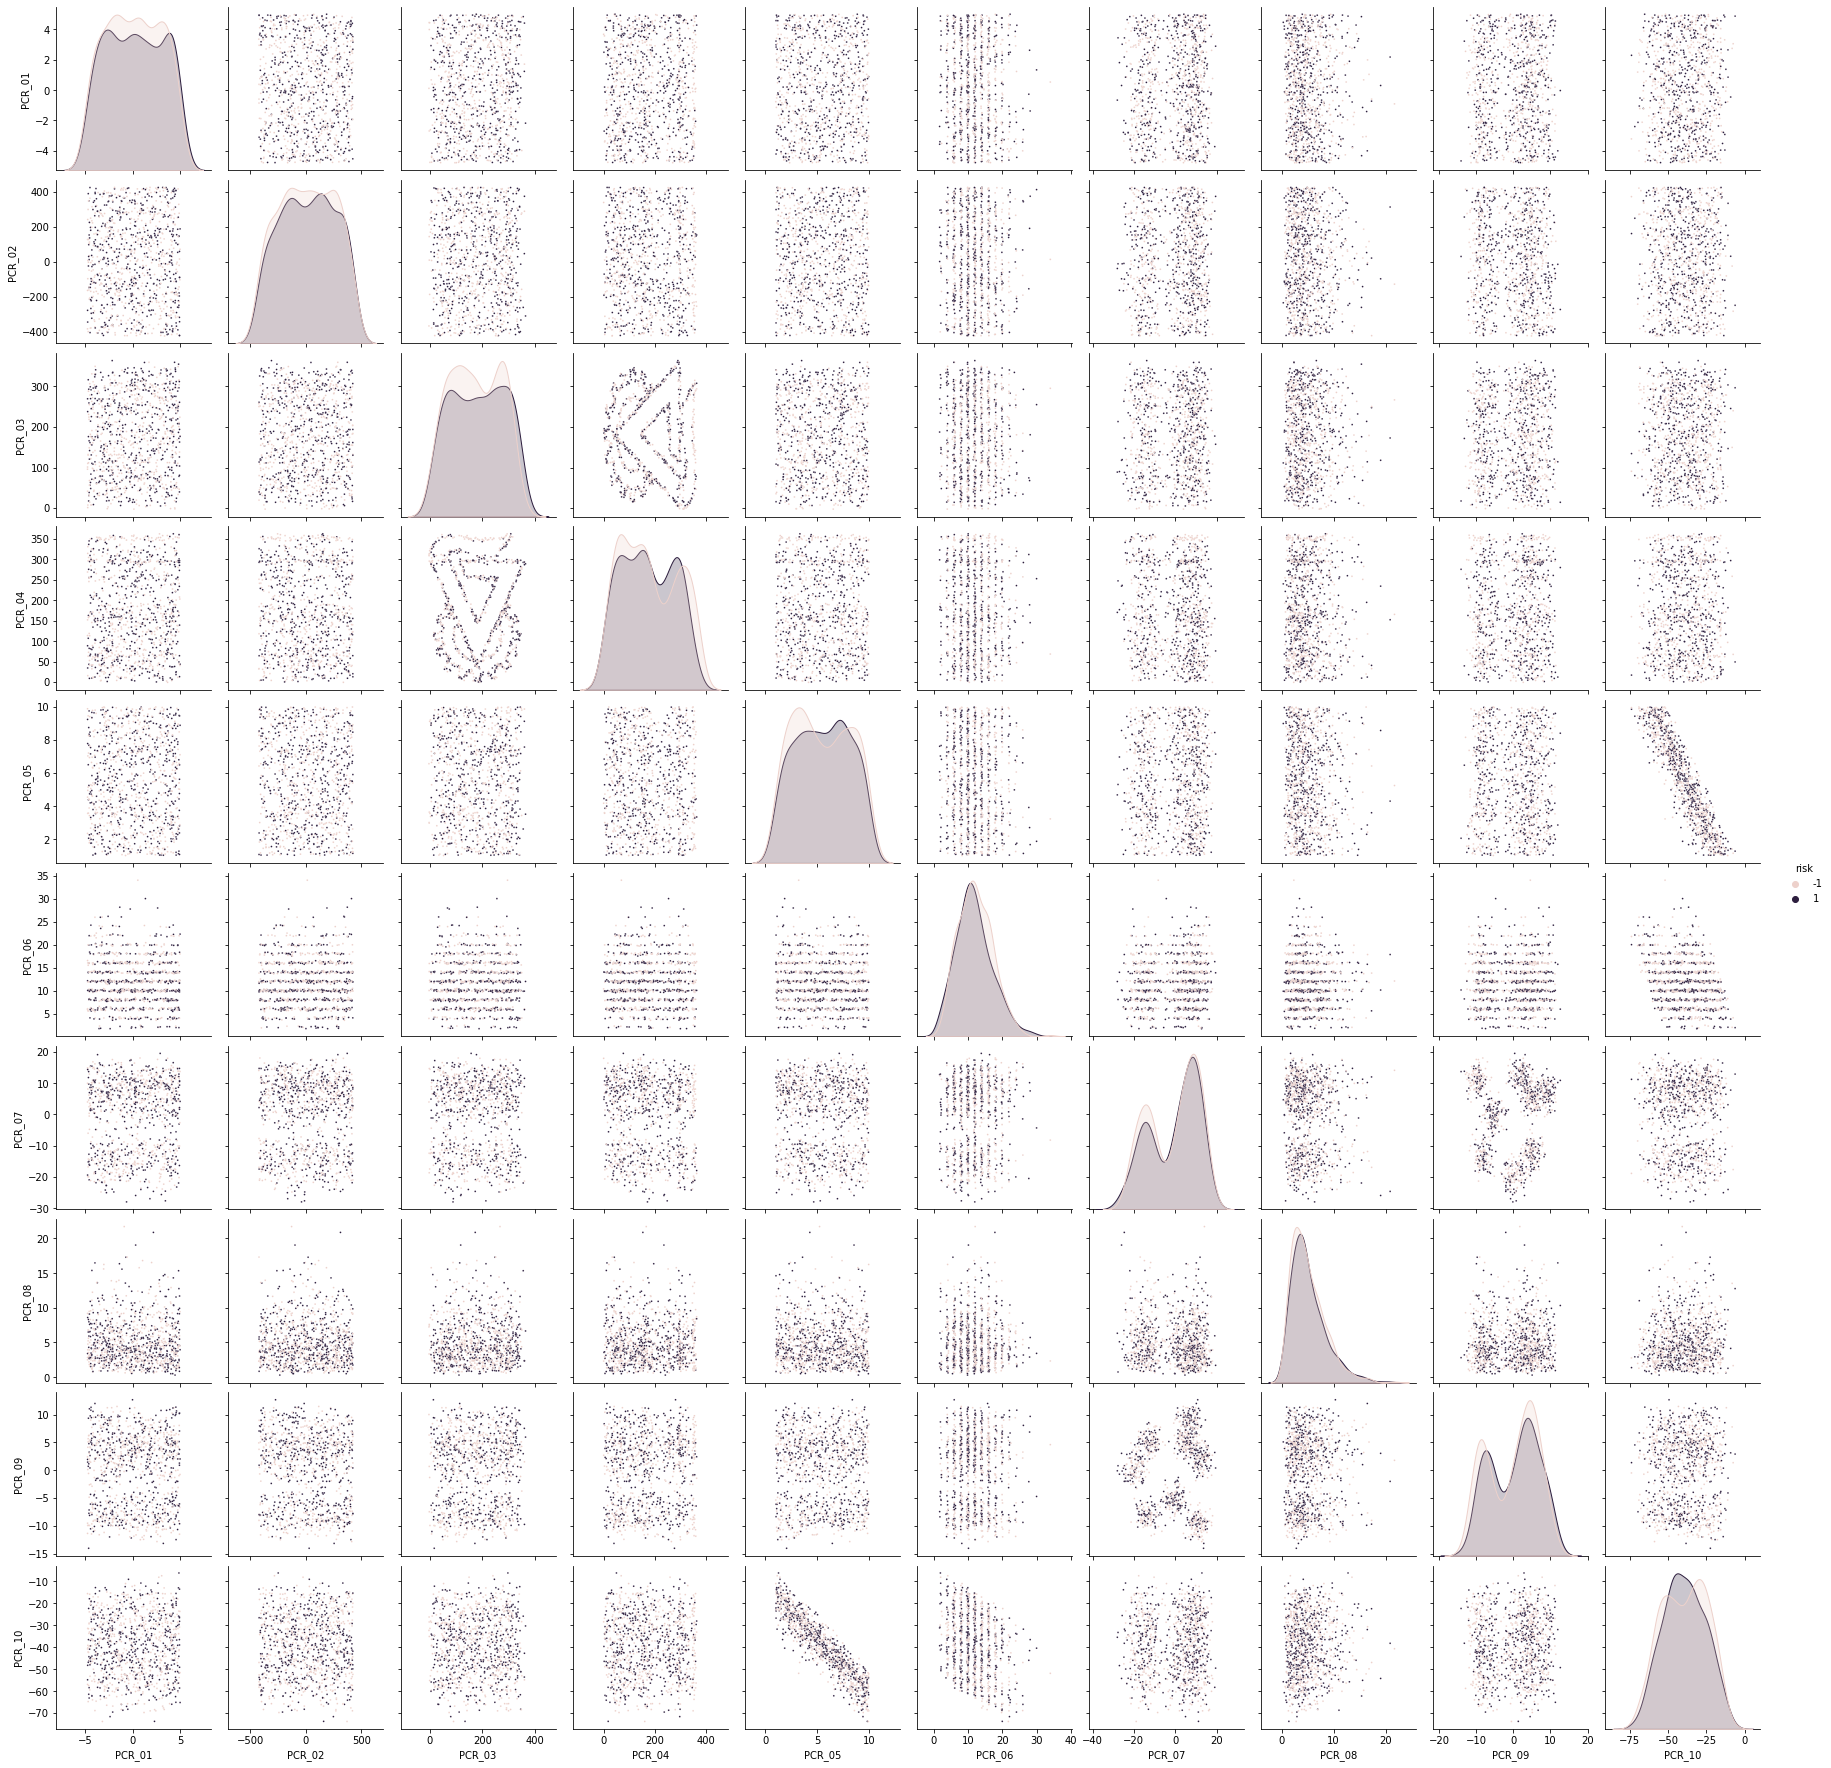

In [ ]:
sns.pairplot(dataset[dataset.filter(like='PCR').columns.tolist() + ["risk"]],
 plot_kws={"s": 3}, hue="risk")

#### Question 18:
Joinplot for pcr3 and pcr4 by blood group

Text(0.5, 0.98, 'PCR_04 vs. PCR_03 (Blood group B/AB)')

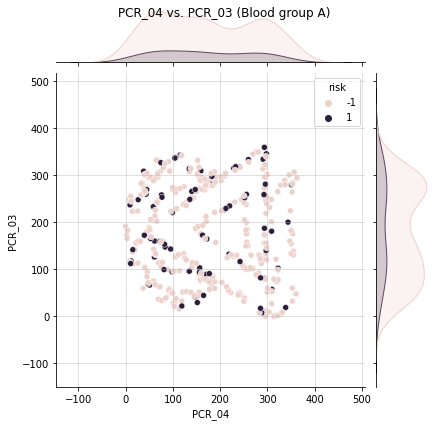

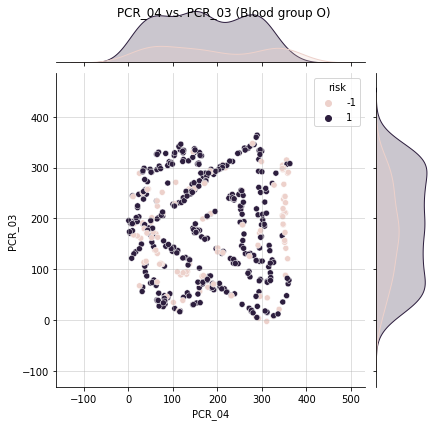

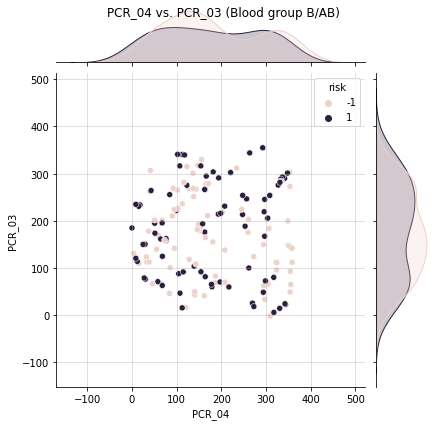

In [ ]:
g = sns.jointplot(x='PCR_04', y='PCR_03', data=dataset[dataset['blood_group_A'] == 1], color='blue', hue='risk')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_04 vs. PCR_03 (Blood group A)")

g = sns.jointplot(x='PCR_04', y='PCR_03', data=dataset[dataset['blood_group_O'] == 1], hue='risk', color='red')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_04 vs. PCR_03 (Blood group O)")

g = sns.jointplot(x='PCR_04', y='PCR_03', data=dataset[dataset['blood_group_B/AB'] == 1], hue='risk', color='green')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_04 vs. PCR_03 (Blood group B/AB)")

Joinplot for pcr5 and pcr10 by blood group

Text(0.5, 0.98, 'PCR_05 vs. PCR_10 (Blood group B/AB)')

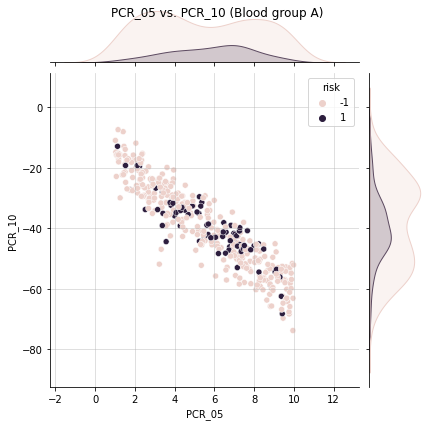

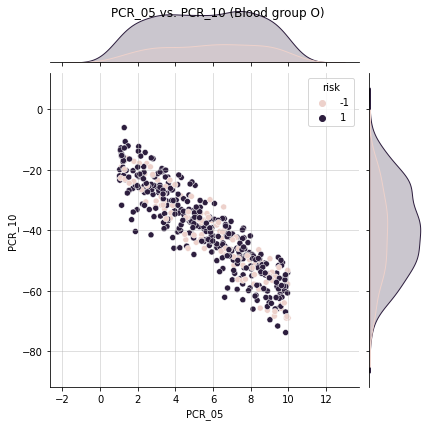

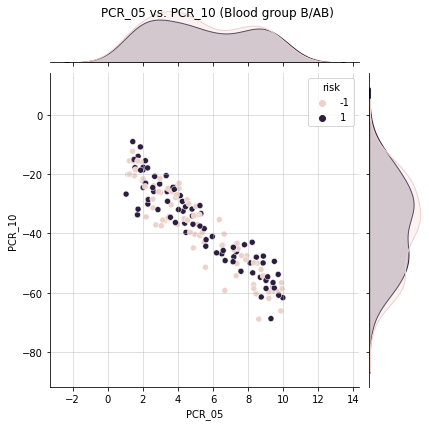

In [ ]:
g = sns.jointplot(x='PCR_05', y='PCR_10', data=dataset[dataset['blood_group_A'] == 1], color='blue', hue='risk')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_05 vs. PCR_10 (Blood group A)")

g = sns.jointplot(x='PCR_05', y='PCR_10', data=dataset[dataset['blood_group_O'] == 1], hue='risk', color='red')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_05 vs. PCR_10 (Blood group O)")

g = sns.jointplot(x='PCR_05', y='PCR_10', data=dataset[dataset['blood_group_B/AB'] == 1], hue='risk', color='green')
_ = g.ax_joint.grid(alpha=0.5)
g.fig.suptitle("PCR_05 vs. PCR_10 (Blood group B/AB)")

## Part 4: More Data Normalization

#### Normalization process for all features

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

all_features = list(dataset.columns)
all_features.remove('spread')
all_features.remove('risk')

mm_features = ['patient_id', 'num_of_siblings', 'happiness_score',
              'sport_activity', 'pcr_date_numeric', 'PCR_01', 'PCR_02', 'PCR_03',
              'PCR_04', 'PCR_05', 'PCR_07', 'PCR_09', 'y_global_coor']


mm_scaler = MinMaxScaler(feature_range=(-1, 1))
ss_scaler = StandardScaler()

for feature in all_features:
  if feature in mm_features:
    dataset[[feature]] = mm_scaler.fit_transform(dataset[[feature]])
  else:
    dataset[[feature]] = ss_scaler.fit_transform(dataset[[feature]])

In [ ]:
dataset.head()

patient_id       age       sex    weight  num_of_siblings  \
1034    0.944917 -1.235989  0.922958 -0.698531            -0.75   
255     0.934902 -1.490727  0.922958 -1.193776            -0.50   
196     0.440160  1.120338  0.922958  0.301215            -0.50   
629    -0.556335 -0.981251  0.922958 -1.494626            -0.50   
1227    0.611417  1.247707  0.922958  0.148476            -0.25   

      happiness_score  household_income  conversations_per_day  sugar_levels  \
1034             0.50          2.059730              -1.243113      0.150152   
255              0.50          1.845237               0.139276     -0.546734   
196              0.25         -1.035711              -0.897516     -0.171488   
629             -0.25          1.525676               2.904052     -0.868373   
1227             0.50          0.957326              -0.551919      0.525398   

      sport_activity  ...  blood_group_O  blood_group_B/AB  symptom_fever  \
1034            -0.5  ...       1.114519         -0.438058      -0.400116   
255              0.5  ...       1.114519         -0.438058      -0.400116   
196              0.0  ...      -0.897248          2.282801      -0.400116   
629             -0.5  ...      -0.897248         -0.438058      -0.400116   
1227            -0.5  ...       1.114519         -0.438058      -0.400116   

      symptom_cough  symptom_shortness_of_breath  symptom_sore_throat  \
1034      -0.441297                    -0.493742             1.296520   
255       -0.441297                    -0.493742             1.296520   
196       -0.441297                    -0.493742             1.296520   
629        2.266047                     2.025350             1.296520   
1227      -0.441297                    -0.493742            -0.771295   

      symptom_low_appetite  x_global_coor  y_global_coor  pcr_date_numeric  
1034             -0.806328       0.357064       0.243551         -0.791209  
255              -0.806328       0.753256       0.716382         -0.494505  
196               1.240190       0.473940      -0.521435          0.766484  
629              -0.806328      -1.419110      -0.308016          0.637363  
1227              1.240190       0.752409      -0.034969         -0.480769  

[5 rows x 33 columns]

## Part 5: Feature Selection

#### Question 23:

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_df_x = dataset.copy()
knn_df_x.drop('spread', axis=1, inplace=True)
knn_df_x.drop('risk', axis=1, inplace=True)
knn_df_y = np.array(dataset.spread)

knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)

sfs.fit(knn_df_x, knn_df_y)

sfs.get_feature_names_out()

array(['weight', 'PCR_01', 'PCR_02'], dtype=object)

## Part 6: Data Preparation Pipeline

In [ ]:
# ===== Module Description:

"""
# Data Preparation Pipeline
This module provides preparation pipeline of data from the covid-19
dataset.
Example:
--------
data_prep = data_preparation(training_data, new_data)
data_prep.prepare()
"""


# ====================
# ===== Imports:

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# ====================

class data_preparation():
  """
  data_preparation class.
  -------
  Attributes
  -------
  - new_dataset : pandas.DataFrame
      Dataframe to prepare

  - training_data_ref : pandas.DataFrame
      Dataframe to prepare by

  - symptoms_per_patient : list
       List of possible features from training_data_ref

  -------
  Protected Methods
  -------
  __seperate_blood_groups(dataset)
  __seperate_symptoms(dataset)
  __seperate_location(dataset)
  __replace_sex(dataset)
  __replace_pcr_date(dataset)
  __normalize()
  -------
  Public Methods
  -------
  prepare()
    Returns the prepared data.

  """
  def __init__(self, training_data, new_data):
    self.new_dataset = new_data.copy()
    self.training_data_ref = training_data.copy()
    self.symptoms_per_patient = [x.split(';') for x in self.training_data_ref["symptoms"] if x is not np.nan]

    self.__seperate_blood_groups(self.training_data_ref)
    self.__seperate_symptoms(self.training_data_ref)
    self.__seperate_location(self.training_data_ref)
    self.__replace_sex(self.training_data_ref)
    self.__replace_pcr_date(self.training_data_ref)


  def __seperate_blood_groups(self, dataset):
  # Groups we seperate by
    blood_groups = {'A': ['A+', 'A-'],
                    'O': ['O-', 'O+'],
                    'B/AB': ['B+', 'B-', 'AB+', 'AB-']}

    for type, blood_group in blood_groups.items():
        # Creating the mew features
        feature = dataset["blood_type"].isin(blood_group).astype(int)
        # Inserting the new features
        dataset['blood_group_' + type] = feature

    # Drop the old blood_type feature
    dataset.drop('blood_type', inplace=True ,axis=1)
    return dataset


  def __seperate_symptoms(self, dataset):
    symptoms = list({x for l in self.symptoms_per_patient for x in l})

    for symptom in symptoms:
      feature = []
      for sample in dataset["symptoms"]:
        if sample is np.nan or symptom not in sample:
          feature.append(0)
        else:
          feature.append(1)

      dataset['symptom_' + symptom] = feature

    # Drop the old symptoms feature   
    dataset.drop('symptoms', inplace=True ,axis=1)
    return dataset


  def __seperate_location(self, dataset):
    # Drop the old current_location feature and adding x_coor and y_coor
    dataset['x_global_coor'] = [float(x.split("'")[1]) for x in dataset['current_location']]
    dataset['y_global_coor'] = [float(x.split("'")[3]) for x in dataset['current_location']]

    dataset.drop(['current_location'], inplace=True, axis=1)
    return dataset


  def __replace_sex(self, dataset):
    # Replace sex with binary is_male & Drop the old current_location
    dataset['sex'] = dataset['sex'].isin(['F']).astype(int)
    return dataset


  def __replace_pcr_date(self, dataset):
    # Drop the old pcr_date feature and replace
    dataset['pcr_date_numeric'] = [int(datetime.strptime(date, '%Y-%m-%d').timestamp()) for date in dataset['pcr_date']]

    dataset.drop(['pcr_date'], inplace=True, axis=1)
    return dataset


  def __normalize(self):
    all_features = list(self.new_dataset.columns)
    all_features.remove('spread')
    all_features.remove('risk')

    mm_features = ['patient_id', 'num_of_siblings', 'happiness_score',
                  'sport_activity', 'pcr_date_numeric', 'PCR_01', 'PCR_02', 'PCR_03',
                  'PCR_04', 'PCR_05', 'PCR_07', 'PCR_09', 'y_global_coor']

    for feature in all_features:
      if feature in mm_features:
        mm_scaler = MinMaxScaler(feature_range=(-1, 1))
        mm_scaler.fit(self.training_data_ref[[feature]])
        self.new_dataset[[feature]] = mm_scaler.transform(self.new_dataset[[feature]])
      else:
        ss_scaler = StandardScaler()
        ss_scaler.fit(self.training_data_ref[[feature]])
        self.new_dataset[[feature]] = ss_scaler.transform(self.new_dataset[[feature]])
    return self.new_dataset


  def prepare(self):
    self.__seperate_blood_groups(self.new_dataset)
    self.__seperate_symptoms(self.new_dataset)
    self.__seperate_location(self.new_dataset)
    self.__replace_sex(self.new_dataset)
    self.__replace_pcr_date(self.new_dataset)
    self.__normalize()

    return self.new_dataset


def preprare_data(training_data, new_data):
  data_prep = data_preparation(training_data, new_data)
  return data_prep.prepare()

Sanity check - we should have got the same dataset as before:

In [ ]:
sss = preprare_data(train,train)
sss.head(33)

sss.equals(dataset)

True